#  <span style="color:seagreen">LISA'S VEGETABLE GARDEN</span>
<span style="color:gold">**2024 Tidytuesday  Week 22** </span>

## Setup

### Libraries

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

In [5]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


#rcParams['font.family'] = 'Press Start 2P'
#rcParams['font.family'] = 'JuliaMono'
rcParams['font.family'] = 'Roboto'

### Data

In [6]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/'

harvest_2020 = 'data/2024/2024-05-28/harvest_2020.csv'
harvest_2021 ='data/2024/2024-05-28/harvest_2021.csv'
planting_2020 = 'data/2024/2024-05-28/planting_2020.csv'
planting_2021 = 'data/2024/2024-05-28/planting_2021.csv'
spending_2020 = 'data/2024/2024-05-28/spending_2020.csv'
spending_2021 = 'data/2024/2024-05-28/spending_2021.csv'

hv_2020 = pd.read_csv(url + harvest_2020)
hv_2021 = pd.read_csv(url + harvest_2021)

pt_2020 = pd.read_csv(url + planting_2020)
pt_2021 = pd.read_csv(url + planting_2021)

sp_2020 = pd.read_csv(url + spending_2020)
sp_2021 = pd.read_csv(url + spending_2021)

## EDA

In [7]:
hv_2020.columns

Index(['vegetable', 'variety', 'date', 'weight', 'units'], dtype='object')

In [8]:
hv_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vegetable  781 non-null    object
 1   variety    781 non-null    object
 2   date       781 non-null    object
 3   weight     781 non-null    int64 
 4   units      781 non-null    object
dtypes: int64(1), object(4)
memory usage: 30.6+ KB


In [9]:
hv_2020.value_counts('units')

units
grams    781
Name: count, dtype: int64

## Data wrangling

### Data cleaning:

- drop `units` columns (harvesting data)
- drop `number_seeds_exact`	and `notes` columns (planting data)
- drop `eggplant_item_number` and `variety` columns (spending data)

In [10]:
hv_2020_df = hv_2020.iloc[:, :-1]
hv_2021_df = hv_2020.iloc[:, :-1]

In [11]:
pt_2020_df = pt_2020.iloc[:, :-2]
pt_2021_df = pt_2021.iloc[:, :-2]

In [12]:
sp_2020_df = sp_2020.loc[:, ['vegetable', 'brand', 'price', 'price_with_tax']]
sp_2021_df = sp_2021.loc[:, ['vegetable', 'brand', 'price', 'price_with_tax']]

### Tranforming columns:

**recode `brand` columns (spending data)**


In [13]:
sp_2020.value_counts('brand')

brand
Renee's Garden     25
farmer's market    15
Seed Savers         9
Baker Creek         7
Kern                2
Naomi               2
leftover            2
Adrienne            1
mine                1
Name: count, dtype: int64

In [14]:
sp_2021.value_counts('brand')

brand
Renee's Garden         6
Seed Savers            5
Baker Creek            1
Botanical Interests    1
Name: count, dtype: int64

In [15]:
brands_2020 = ["Renee's Garden", "farmer's market", "Seed Savers", "Baker Creek"]
sp_2020_df['brand2'] = np.where(np.isin(sp_2020_df.loc[:, 'brand'], brands_2020), 
    sp_2020_df.loc[:, 'brand'],
    "Other brands")

In [16]:
brands_2021 = ["Baker Creek", "Botanical Interests"]
sp_2021_df['brand2'] = np.where(np.isin(sp_2021_df.loc[:, 'brand'], brands_2021), 
    "Other brands",
    sp_2021_df.loc[:, 'brand'])

In [17]:
sp_2021_df.value_counts('brand2')

brand2
Renee's Garden    6
Seed Savers       5
Other brands      2
Name: count, dtype: int64

**update `date` column to date type (harvesting and planting data)**

In [18]:
dob = "08-13-2018"
dfmt = "%m-%d-%Y"
datetime.datetime.strptime(dob, dfmt)

datetime.datetime(2018, 8, 13, 0, 0)

In [19]:
pt_2020_df['date'] = pd.to_datetime(pt_2020_df['date'])
pt_2021_df['date'] = pd.to_datetime(pt_2021_df['date'])

hv_2020_df['date'] = pd.to_datetime(hv_2020_df['date'])
hv_2021_df['date'] = pd.to_datetime(hv_2021_df['date'])

In [20]:

pt_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  102 non-null    datetime64[ns]
 1   vegetable             102 non-null    object        
 2   variety               102 non-null    object        
 3   plot                  102 non-null    object        
 4   number_seeds_planted  102 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.1+ KB


**Rename `number_seeds_planted` column to `seeds` (planting data)**

In [21]:
pt_2020_df.rename(columns = {'number_seeds_planted':'seeds'}, inplace=True)

In [22]:
pt_2021_df.rename(columns = {'number_seeds_planted':'seeds'}, inplace=True)

**Create a new column for `year`**

In [23]:
pt_2020_df['year'] = 2020
pt_2021_df['year'] = pt_2021_df['date'].dt.year

In [24]:
hv_2020_df['year'] = 2020
hv_2021_df['year'] = hv_2021_df['date'].dt.year

In [25]:
sp_2020_df['year'] = 2020
sp_2021_df['year'] = 2021

## Data analysis

### Average price by  vegetable

In [30]:
sdf = (pd.concat(
    [sp_2020_df, sp_2021_df], 
    ignore_index=True, axis=0)
    .groupby(['vegetable', 'year'])['price']
    .mean()
    .sort_values()
    .reset_index()
)

In [32]:
sdf['price'].mean()

6.007953162397063

<Axes: ylabel='vegetable'>

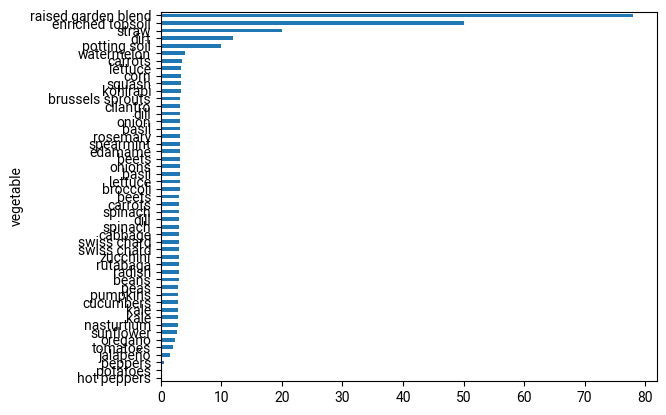

In [38]:

sdf.set_index('vegetable')['price'].plot(kind = 'barh')

<Axes: ylabel='vegetable'>

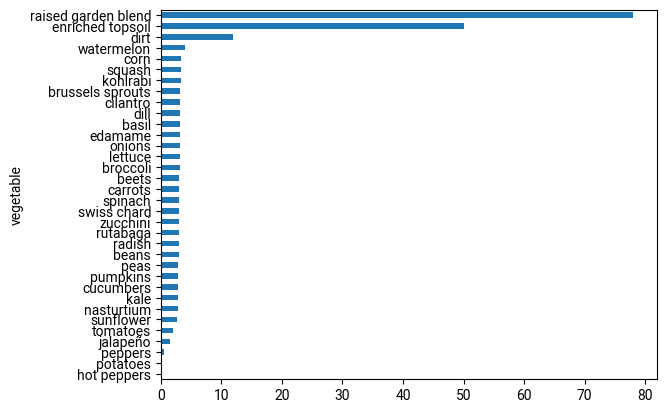

In [43]:
sdf_2020 = sdf[sdf.year == 2020].set_index('vegetable')
sdf_2020['price'].plot(kind = 'barh')


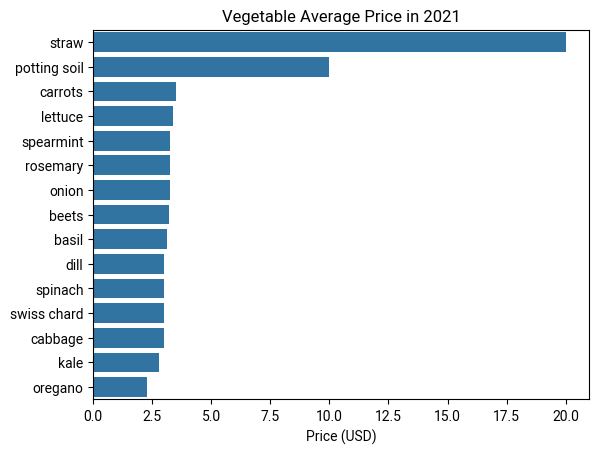

In [50]:
sdf_2021 = sdf[sdf.year == 2021].sort_values('price', ascending=False)

fig, ax = plt.subplots()

sns.barplot(sdf_2021, x = 'price', y = 'vegetable')

ax.set_title('Vegetable Average Price in 2021')

ax.set_xlabel('Price (USD)')
ax.set_ylabel('')

plt.show()